In [64]:
import cv2
import numpy as np


def rotated_image(image: np.ndarray, angle: int = 90) -> np.ndarray:
    """Rotate image by angle degrees."""
    width, height, _ = image.shape
    transform = cv2.getRotationMatrix2D((height / 2, width / 2), angle, 1)
    result = cv2.warpAffine(image, transform, (height, width))

    return result

In [18]:
bool('123')

True

In [10]:
import matplotlib.pyplot as plt

def imshow(img):
    plt.imshow(img)

In [43]:
from skimage import data
image = skimage.data.astronaut()[300:,:]

(212, 512, 3)


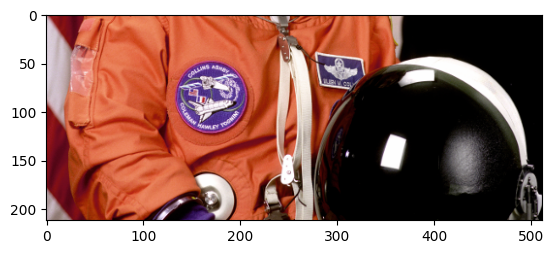

In [65]:
print(astro.shape)
imshow(astro)

(212, 512, 3)


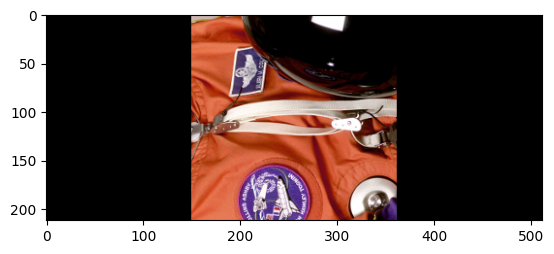

In [66]:
print(rotated_image(astro).shape)
imshow(rotated_image(astro))

In [87]:
my_dict = {'1':123,'123':23}

In [107]:
import numpy as np


def mse(y: np.ndarray) -> float:
    """Compute the mean squared error of a vector."""

    y_pred = np.mean(y)
    mse = np.sum((y - y_pred)**2 / len(y))

    return mse


def weighted_mse(y_left: np.ndarray, y_right: np.ndarray) -> float:
    """Compute the weighted mean squared error of two vectors."""

    mse_wegh = (mse(y_left) * len(y_left) +
                mse(y_right) * len(y_right)) / (len(y_left) + len(y_right))

    return mse_wegh


def split(X: np.ndarray, y: np.ndarray, feature: int) -> float:
    """Find the best split for a node (one feature)"""

    scores = {}
    for x in np.unique(X[:, feature]):
        scores[x] = weighted_mse(
            X[:, feature][X[:, feature] <= x], X[:, feature][X[:, feature] > x])

    best_threshold = [i for i in scores if scores[i] == min(scores.values())]

    return float(best_threshold[0])

In [ ]:
from typing import List, Tuple
from typing import Tuple

import numpy as np
from scipy.stats import ttest_ind


def quantile_ttest(
    control: List[float],
    experiment: List[float],
    alpha: float = 0.05,
    quantile: float = 0.95,
    n_bootstraps: int = 1000,
) -> Tuple[float, bool]:
    """
    Bootstrapped t-test for quantiles of two samples.
    """
    def bootstrapped_quant(control, experiment, n_bootstraps: int) -> Tuple[List, List]:
        """Bootstrapped median distribution"""
        bootstrapped_quant_co = []
        bootstrapped_quant_ex = []

        for _ in range(n_bootstraps):
            mask_con = np.random.choice(
                range(0, len(control)), size=len(control), replace=True)
            mask_exp = np.random.choice(
                range(0, len(experiment)), size=len(experiment), replace=True)

            bootstrapped_quant_co.append(
                np.quantile(control[mask_con]), quantile)
            bootstrapped_quant_ex.append(
                np.quantile(experiment[mask_exp]), quantile)

        return bootstrapped_quant_co, bootstrapped_quant_ex

    bootstrapped_quant_co, bootstrapped_quant_ex = bootstrapped_quant(
        control, experiment, n_bootstraps)
    _, p_value = stats.ttest_ind(bootstrapped_quant_co, bootstrapped_quant_ex)
    result = p_value < alpha

    return p_value, bool(result)

In [99]:
np.array([[1,123,2,3], [1,2,4,2]])

array([[  1, 123,   2,   3],
       [  1,   2,   4,   2]])

In [106]:
split(np.array([[1,123,2,3], [1,2,4,2]]), np.array([1,0,0,1]), 0)

In [2]:
asd = 0.5 < 0.4

In [2]:
col = 100000000

In [6]:
%%time
import pandas as pd
abd_pd = pd.DataFrame([np.nan] * col)

CPU times: user 8.33 s, sys: 2.74 s, total: 11.1 s
Wall time: 11.1 s


In [7]:
%%time
abd_np = np.array([np.nan] * col)

CPU times: user 3.34 s, sys: 249 ms, total: 3.59 s
Wall time: 3.58 s


In [4]:
%%time 
abd.fillna(0)

CPU times: user 182 ms, sys: 111 ms, total: 293 ms
Wall time: 292 ms


,0
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
99999995,0.0
99999996,0.0
99999997,0.0
99999998,0.0


In [11]:
%%time 
np.where(abd == np.nan, 0, 1)

CPU times: user 42.5 ms, sys: 335 ms, total: 378 ms
Wall time: 377 ms


array([[1],
       [1],
       [1],
       ...,
       [1],
       [1],
       [1]])

In [41]:
X = np.array([[1,23,4],[2,3,4]])
y = np.array([1,2])

In [78]:
import pandas as pd

In [154]:
from __future__ import annotations
from dataclasses import dataclass
import numpy as np
import json


@dataclass
class Node:
    """Decision tree node."""
    feature: int = 0
    threshold: float = 0
    n_samples: int = 0
    value: int = 0
    mse: float = 0
    left: Node = None
    right: Node = None


@dataclass
class DecisionTreeRegressor:
    """Decision tree regressor."""
    max_depth: int
    min_samples_split: int = 2

    def fit(self, X: np.ndarray, y: np.ndarray) -> DecisionTreeRegressor:
        """Build a decision tree regressor from the training set (X, y)."""
        self.n_features_ = X.shape[1]
        self.tree_ = self._split_node(X, y, depth=0)
        return self

    def _mse(self, y: np.ndarray) -> float:
        """Compute the mse criterion for a given set of target values."""
        y_pred = np.mean(y)
        mse = np.sum((y - y_pred) ** 2) / len(y)
        return mse

    def _weighted_mse(self, y_left: np.ndarray, y_right: np.ndarray) -> float:
        """Compute the weighted mse criterion for two given sets of target values."""
        if len(y_left) + len(y_right) == 0:
            mse_weighted = 0
        else:
            mse_weighted = (self._mse(y_left) * len(y_left) +
                            self._mse(y_right) * len(y_right)) / (len(y_left) + len(y_right))
        return mse_weighted

    def _split(self, X: np.ndarray, y: np.ndarray, feature: int, threshold: float) -> float:
        """Calculate the mse for splitting on a feature and threshold."""
        y_left = y[X[:, feature] <= threshold]
        y_right = y[X[:, feature] > threshold]
        mse_split = self._weighted_mse(y_left, y_right)
        return mse_split

    def _best_split(self, X: np.ndarray, y: np.ndarray) -> tuple[int, float]:
        """Find the best split for a node."""
        best_feature = None
        best_threshold = None
        best_mse = float('inf')

        for feature in range(self.n_features_):
            unique_values = np.unique(X[:, feature])
            for threshold in unique_values:
                mse_split = self._split(X, y, feature, threshold)
                if mse_split < best_mse:
                    best_feature = feature
                    best_threshold = threshold
                    best_mse = mse_split

        return best_feature, best_threshold

    def _split_node(self, X: np.ndarray, y: np.ndarray, depth: int = 0) -> Node:
        """Recursively split a node and build the tree."""
        n_samples, n_features = X.shape

        # Create a leaf node if the stopping criteria are met
        if depth >= self.max_depth or n_samples < self.min_samples_split:
            node = Node(n_samples=n_samples,
                        value=round(np.mean(y)), mse=self._mse(y))
            return node

        # Find the best split for this node
        best_feature, best_threshold = self._best_split(X, y)

        # If no valid split is found, create a leaf node
        if best_feature is None:
            node = Node(n_samples=n_samples,
                        value=round(np.mean(y)), mse=self._mse(y))
            return node

        # Split the data based on the best feature and threshold
        left_mask = X[:, best_feature] <= best_threshold
        right_mask = ~left_mask

        X_left, y_left = X[left_mask], y[left_mask]
        X_right, y_right = X[right_mask], y[right_mask]

        # Recursively build the left and right subtrees
        left_subtree = self._split_node(X_left, y_left, depth + 1)
        right_subtree = self._split_node(X_right, y_right, depth + 1)

        # Create the current node with the splitting information
        node = Node(
            feature=best_feature,
            threshold=best_threshold,
            n_samples=n_samples,
            value=round(np.mean(y)),
            mse=self._mse(y),
            left=left_subtree,
            right=right_subtree
        )

        return node
    
    def as_json(self, decimals: int = 2) -> str:
        """Return the decision tree as a JSON-like string."""
        if self.tree_ is None:
            return "{}"
        return self._as_json(self.tree_, decimals=decimals)

    def _as_json(self, node: Node, decimals: int = 2) -> str:
        """Return the decision tree as a JSON-like string. Execute recursively."""
        if node is None:
            return "{}"

        if node.left is None and node.right is None:
            # If it's a leaf, create a JSON-like string for the leaf
            return f'{{"value": {int(node.value)}, "mse": {round(float(node.mse), decimals)}}}'

        # Convert NumPy integers to Python integers
        feature = int(node.feature)
        threshold = float(node.threshold)
        n_samples = int(node.n_samples)

        # Create a JSON-like string for the current node and recursively for left and right subtrees
        return f'{{"feature": {feature}, "threshold": {round(threshold, decimals)}, "n_samples": {n_samples}, "mse": {round(float(node.mse), decimals)}, ' \
               f'"left": {self._as_json(node.left, decimals=decimals)}, "right": {self._as_json(node.right, decimals=decimals)}}}'


In [132]:
data = pd.read_csv('/home/artur/my_projects/karpov-projects/intern/dec tree/COUNT_SKU_2023_09_07.csv')
y = data['delay_days'].values
X = data.iloc[:, :-1].values

In [153]:
DecisionTreeRegressor(max_depth =3).fit(X = X, y = y).as_json()

/home/artur/.local/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/artur/.local/lib/python3.10/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/tmp/ipykernel_98355/1269516435.py:34: RuntimeWarning: invalid value encountered in scalar divide
  mse = np.sum((y - y_pred) ** 2) / len(y)


'{"feature": 1, "threshold": 44443.0, "n_samples": 1000, "mse": 408.93, "left": {"feature": 8, "threshold": 370968.0, "n_samples": 406, "mse": 600.77, "left": {"feature": 9, "threshold": 960.0, "n_samples": 320, "mse": 268.42, "left": {"value": 10, "mse": 77.61}, "right": {"value": 32, "mse": 247.34}}, "right": {"feature": 9, "threshold": 720.0, "n_samples": 86, "mse": 874.15, "left": {"value": 30, "mse": 277.97}, "right": {"value": 71, "mse": 587.65}}}, "right": {"feature": 8, "threshold": 361375.0, "n_samples": 594, "mse": 76.91, "left": {"feature": 9, "threshold": 1380.0, "n_samples": 471, "mse": 24.29, "left": {"value": 1, "mse": 5.05}, "right": {"value": 7, "mse": 56.05}}, "right": {"feature": 1, "threshold": 52599.0, "n_samples": 123, "mse": 198.48, "left": {"value": 29, "mse": 175.95}, "right": {"value": 8, "mse": 105.15}}}}'

In [110]:
{"feature": 1, "threshold": 39254, "n_samples": 10000, "mse": 423.77, "left": {"feature": 8, "threshold": 423727, "n_samples": 3232, "mse": 627.05, "left": {"feature": 9, "threshold": 1110, "n_samples": 2782, "mse": 326.93, "left": {"value": 14, "n_samples": 1684, "mse": 125.88}, "right": {"value": 38, "n_samples": 1098, "mse": 306.82}}, "right": {"feature": 9, "threshold": 840, "n_samples": 450, "mse": 868.11, "left": {"value": 46, "n_samples": 203, "mse": 454.67}, "right": {"value": 84, "n_samples": 247, "mse": 581.78}}}, "right": {"feature": 8, "threshold": 469684, "n_samples": 6768, "mse": 159.8, "left": {"feature": 1, "threshold": 53806, "n_samples": 6075, "mse": 65.72, "left": {"value": 10, "n_samples": 2065, "mse": 115.01}, "right": {"value": 2, "n_samples": 4010, "mse": 17.03}}, "right": {"feature": 1, "threshold": 63861, "n_samples": 693, "mse": 610.74, "left": {"value": 40, "n_samples": 372, "mse": 536.93}, "right": {"value": 8, "n_samples": 321, "mse": 136.68}}}}. But got json: {"feature": 1, "threshold": 39254, "n_samples": 10000, "mse": 423.7747239899999, "left": {"feature": 8, "threshold": 423727, "n_samples": 3232, "mse": 627.0530631188119, "left": {"feature": 9, "threshold": 1110, "n_samples": 2782, "mse": 326.93107741509687, "left": {"value": 14, "n_samples": 1684, "mse": 125.87805022539929}, "right": {"value": 38, "n_samples": 1098, "mse": 306.82185858706504}}, "right": {"feature": 9, "threshold": 840, "n_samples": 450, "mse": 868.1104395061728, "left": {"value": 46, "n_samples": 203, "mse": 454.6714552646266}, "right": {"value": 84, "n_samples": 247, "mse": 581.7773771082956}}}, "right": {"feature": 8, "threshold": 469684, "n_samples": 6768, "mse": 159.7960519387229, "left": {"feature": 1, "threshold": 53806, "n_samples": 6075, "mse": 65.7197832037799, "left": {"value": 10, "n_samples": 2065, "mse": 115.01070745563379}, "right": {"value": 2, "n_samples": 4010, "mse": 17.031158077375135}}, "right": {"feature": 1, "threshold": 63861, "n_samples": 693, "mse": 610.7381420887915, "left": {"value": 40, "n_samples": 372, "mse": 536.932766793849}, "right": {"value": 8, "n_samples": 321, "mse": 136.67518754670468}}}} 

SyntaxError: invalid syntax (2428886067.py, line 1)